In [11]:
import math, random, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *

N_Docs = 1500 
N_Words = 12419
Nonzero_Counts = 746316
raw_data = pd.read_csv('data_processed.txt', delimiter = ' ')
vocab = pd.read_csv('vocab.nips.txt')

print('data read, np-ifying now')

Word_Totals = np.zeros(N_Words)

data = np.zeros( (N_Words, N_Docs)) 
for i in tqdm_notebook(range(Nonzero_Counts)):
    data[raw_data['Word'][i]-1][raw_data['Doc'][i]-1]=raw_data['Count'][i]



#resources
#pg 234 in text
#https://github.com/sseemayer/mixem/tree/master/mixem
#http://www.cs.

data read, np-ifying now



In [2]:
for i in tqdm_notebook(range(N_Words)):
    Word_Totals[i] = np.sum(data[i])
    
zeroes = not np.nonzero(Word_Totals)

data = np.delete(data, zeroes, axis=0)
Word_Totals = np.delete(Word_Totals, zeroes, axis=0)
N_Words = data.shape[0]
print(data.shape, N_Words)


#resources
#pg 234 in text
#https://github.com/sseemayer/mixem/tree/master/mixem
#http://www.cs.
#columbia.edu/~jebara/4771/tutorials/multinomial.pdf

E:\ProgramFilesE\Anaconda\lib\site-packages\numpy\lib\function_base.py:4265: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  "as boolean index instead of casting it to integer", FutureWarning)


(12418, 1500) 12418


In [12]:
#https://en.wikipedia.org/wiki/Multinomial_distribution
#n, the number of trials is the sum of a document's word counts
#doc is a row off of the doc array, with each index corresponding to a word, and the value there being the count
#params is the probability of seeing a certain word - this is precalculated in the main flow. it is the {p1,p2,...pn}

def multinomial_logpdf(word, param):
    log_nfact = math.log(math.factorial(np.sum(word)))
    log_xis = 0
    log_probs = 0
    for i in range(N_Docs):
        if word[i] > 0 and param[i] > 0 :
            log_xis += math.log(math.factorial(word[i]))
            log_probs += math.log(param[i]) *word[i]
    
    return log_nfact + log_probs - log_xis



In [13]:
topic_params = np.random.rand(30, N_Docs)
for i in range(30):
    sum = np.sum(topic_params[i])
    for j in range(N_Docs):
        topic_params[i][j] /= sum

Word_Labels = np.zeros(N_Words)
Word_Probs = np.zeros((N_Words, 30)) #w_ij values for each word x topic combo


Word_Rates = np.zeros((N_Words, N_Docs))#the rates at which words appear in documents. pre-calculated to save time
for i in tqdm_notebook(range(N_Words)):
    sum = np.sum(data[i])
    for j in range(N_Docs):
        if data[i][j] != 0:
            Word_Rates[i][j] = data[i][j]/sum

print("setup completed")
#outline
#For each Document:
#    Calculate all 30 Doc_probs (1 for each topic_param) using logpdf
#        Assign highest as Doc_Label
#For each topic:
#    For each document labelled as this topic
#        Average Doc_rates for each document to create new topic param
#Rinse and repeat, I think



setup completed


In [ ]:
def Assign_Labels(data, Word_Labels, Word_Probs, topic_params):
    for i in tqdm_notebook(range(N_Words)):
        for j in range(30):
            Word_Probs[i][j] = multinomial_logpdf(data[i], topic_params[j])
        Word_Labels[i] = np.argmax(Word_Probs[i])

def estimate_params(Word_Rates, topic_params, Doc_Labels):
    for i in range(30):
        topic_params[i,:] = 0
        n = 0
        for j in range(N_Docs):
            if Word_Labels[j] == i:
                topic_params[i,:] += Word_Rates[j,:]
                n+=1
        topic_params[i,:] /= n


In [15]:
Assign_Labels(data, Word_Labels, Word_Probs, topic_params)
print(Word_Labels)



[ 11.  11.  25. ...,  15.  25.   8.]


In [16]:
estimate_params(Word_Rates, topic_params, Word_Labels)

66
52
42
36
57
57
50
57
59
44
57
36
45
56
40
34
35
54
49
54
68
66
49
43
49
51
51
41
49
53



In [19]:
old_Labels = Word_Labels
Word_Labels = numpy.zeros(N_Words)

for i in range(20):
    Assign_Labels(data, Word_Labels, Word_Probs, topic_params)
    estimate_params(Word_Rates, topic_params, Word_Labels)
    if (np.sum(np.diff(Old_Labels, Word_Labels))):
        break
    print("iter "+str(i) + ": " + str(np.sum(np.diff(Old_Labels, Word_Labels))) )
    old_Labels = Word_Labels
    Word_Labels = numpy.zeros(N_Words)

SyntaxError: invalid syntax (<ipython-input-19-1220d3c53afe>, line 8)

E:\ProgramFilesE\Anaconda\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 4381.  1580.  1221.   868.   619.  3231.   519.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]


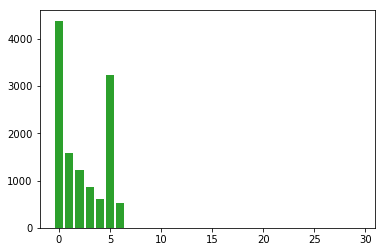

In [25]:
#Graphing time
#Produce a graph showing, for each topic, the probability with which the topic is selected.

Topic_Totals = np.zeros(30)
#Word_Labels == i
for i in range(N_Words):
    Topic_Totals[Word_Labels[i]] += 1
print(Topic_Totals)
plt.bar(left = range(0,30), height = Topic_Totals)
plt.show(block = False)

In [ ]:
Topic_TopTens = np.zeros((30,10))
